# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
cities

['provideniya',
 'taolanaro',
 'geraldton',
 'port alfred',
 'qaanaaq',
 'ushuaia',
 'richards bay',
 'albany',
 'new norfolk',
 'daru',
 'alofi',
 'tuktoyaktuk',
 'asfi',
 'coquimbo',
 'cape town',
 'punta arenas',
 'salamiyah',
 'ballina',
 'tipperary',
 'hilo',
 'aasiaat',
 'muscat',
 'marzuq',
 'yellowknife',
 'ust-tsilma',
 'anapskaya',
 'victoria',
 'tasiilaq',
 'hermanus',
 'kulhudhuffushi',
 'port-cartier',
 'barrow',
 'faanui',
 'pskov',
 'bluff',
 'mataura',
 'winnemucca',
 'hervey bay',
 'dosso',
 'atuona',
 'kapaa',
 'bubaque',
 'minab',
 'lokken verk',
 'busselton',
 'saskylakh',
 'isangel',
 'belushya guba',
 'hirado',
 'nadym',
 'amarillo',
 'rikitea',
 'saldanha',
 'broome',
 'jamestown',
 'vardo',
 'alyangula',
 'illoqqortoormiut',
 'grand gaube',
 'oistins',
 'tokzar',
 'pangnirtung',
 'dingle',
 'saint-philippe',
 'tautira',
 'port lincoln',
 'sao joao da barra',
 'kurumkan',
 'chuy',
 'nuuk',
 'mys shmidta',
 'whitehorse',
 'kavaratti',
 'urdzhar',
 'moron',
 'svetl

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import json
import requests
import gmaps
from pprint import pprint
import time

#Weather API Key
from api_keys import weather_api_key


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [5]:

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [6]:
#test pull for json() response
weather_response = requests.get(query_url + "new york")
weather_data = weather_response.json()
weather_data

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 56.25,
  'feels_like': 53.92,
  'temp_min': 53.6,
  'temp_max': 59,
  'pressure': 1019,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 0},
 'clouds': {'all': 90},
 'dt': 1618331402,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1618309184,
  'sunset': 1618356766},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [7]:
weather_data['main']['temp_max']

59

In [8]:
data = []

counter = 0

#to limit loop use this for city in cities[:50] = [:50] indicates the limiter number.
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_data = weather_response.json()
    counter = counter + 1
    
    try:
        max_temp = weather_data['main']['temp_max']
        speed = weather_data['wind']['speed']
        humidity = weather_data['main']['humidity']
        cloudiness = weather_data['clouds']['all']
        date = weather_data['dt']
        latitude = weather_data['coord']['lat']
        longitude = weather_data['coord']['lon']
        country = weather_data['sys']['country']
        data.append([city,max_temp,speed,humidity,cloudiness,date,latitude,longitude,country])
        time.sleep(.2)
    except:
        print("City not found")


City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


In [9]:
print(len(data))

562


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_df = pd.DataFrame(data,columns=["city","max_temp","speed",
                                     "humidity","cloudiness","date","latitude","longitude","country"])
city_df.head()

,city,max_temp,speed,humidity,cloudiness,date,latitude,longitude,country
0,provideniya,17.46,12.30,92,100,1618331742,64.3833,-173.3000,RU
1,geraldton,57.20,8.05,88,0,1618331743,-28.7667,114.6000,AU
2,port alfred,72.27,9.98,91,17,1618331743,-33.5906,26.8910,ZA
3,qaanaaq,-1.84,4.68,97,100,1618331744,77.4840,-69.3632,GL
4,ushuaia,48.20,5.75,49,0,1618331636,-54.8000,-68.3000,AR


In [11]:
# Column Reordering
weather_df = city_df.rename(columns={"date": "Date","city": "City Name","country": "Country",
                                      "latitude": "Latitude","longitude": "Longitude",
                                      "max_temp": "Max Temp",
                                       "humidity": "Humidity",
                                      "cloudiness": "Cloudiness",
                                      "speed": "Windspeed (mph)"})
# Visualize
weather_df.head()

,City Name,Max Temp,Windspeed (mph),Humidity,Cloudiness,Date,Latitude,Longitude,Country
0,provideniya,17.46,12.30,92,100,1618331742,64.3833,-173.3000,RU
1,geraldton,57.20,8.05,88,0,1618331743,-28.7667,114.6000,AU
2,port alfred,72.27,9.98,91,17,1618331743,-33.5906,26.8910,ZA
3,qaanaaq,-1.84,4.68,97,100,1618331744,77.4840,-69.3632,GL
4,ushuaia,48.20,5.75,49,0,1618331636,-54.8000,-68.3000,AR


In [12]:
#Rearrange Columns
weather_df = weather_df.reindex(columns=["City Name","Latitude","Longitude","Max Temp",
                                         "Humidity","Cloudiness","Windspeed (mph)","Country","Date"])
weather_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed (mph),Country,Date
0,provideniya,64.3833,-173.3000,17.46,92,100,12.30,RU,1618331742
1,geraldton,-28.7667,114.6000,57.20,88,0,8.05,AU,1618331743
2,port alfred,-33.5906,26.8910,72.27,91,17,9.98,ZA,1618331743
3,qaanaaq,77.4840,-69.3632,-1.84,97,100,4.68,GL,1618331744
4,ushuaia,-54.8000,-68.3000,48.20,49,0,5.75,AR,1618331636


In [23]:
#Statistics
weather_df.describe()


,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed (mph),Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.974617,20.793157,60.341192,66.820285,49.314947,8.144004,1.618332e+09
std,33.454651,90.787884,24.265838,23.907160,38.535889,4.911955,1.124969e+02
min,-54.800000,-175.200000,-26.500000,3.000000,0.000000,0.180000,1.618331e+09
25%,-8.604725,-65.539175,47.122500,51.250000,6.000000,4.595000,1.618332e+09
50%,25.204150,25.760050,64.400000,72.000000,48.000000,7.025000,1.618332e+09
75%,47.661475,102.075025,78.800000,87.000000,90.000000,10.987500,1.618332e+09
max,78.218600,179.316700,109.400000,100.000000,100.000000,31.070000,1.618332e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#all cities are <= max of 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

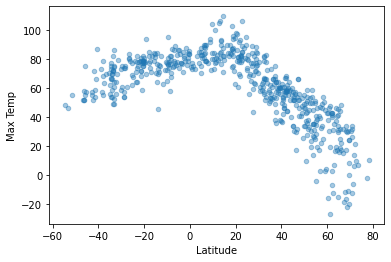

In [29]:
weather_df.plot(kind="scatter", x="Latitude", y="Max Temp", alpha=0.4)
plt.show()

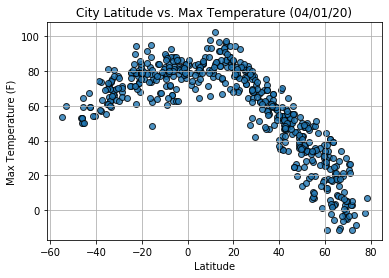

## Latitude vs. Humidity Plot

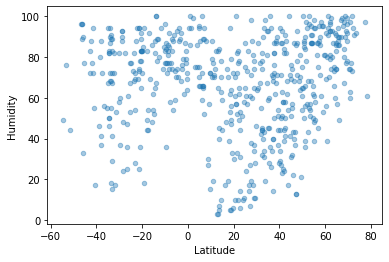

In [27]:
weather_df.plot(kind="scatter", x="Latitude", y="Humidity", alpha=0.4)
plt.show()

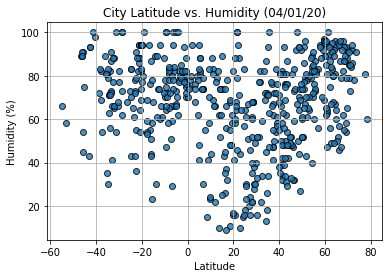

## Latitude vs. Cloudiness Plot

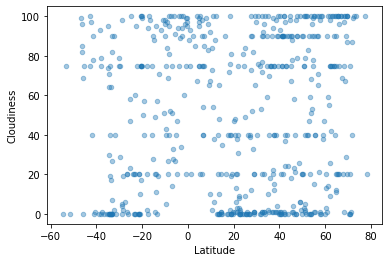

In [31]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", alpha=0.4)
plt.show()

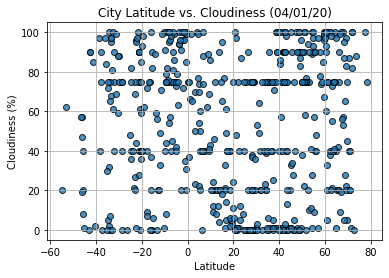

## Latitude vs. Wind Speed Plot

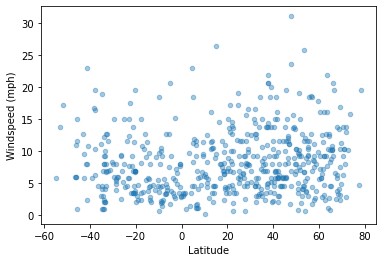

In [32]:
weather_df.plot(kind="scatter", x="Latitude", y="Windspeed (mph)", alpha=0.4)
plt.show()

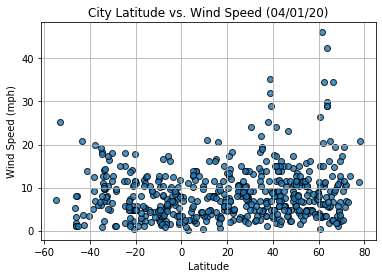

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


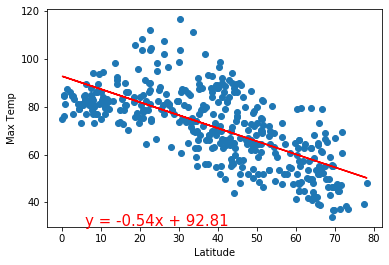

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


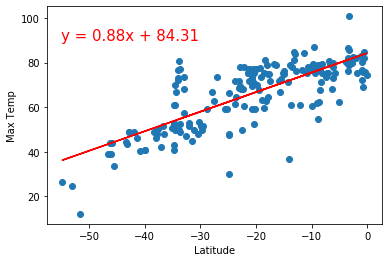

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


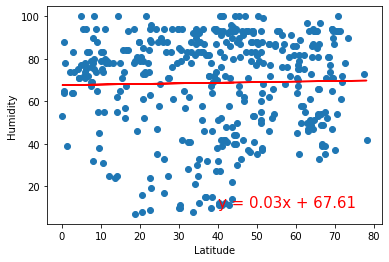

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


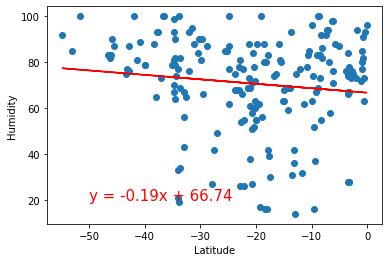

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


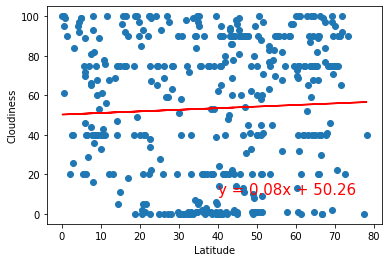

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


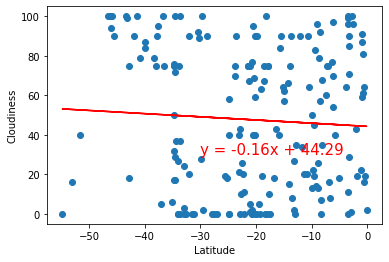

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


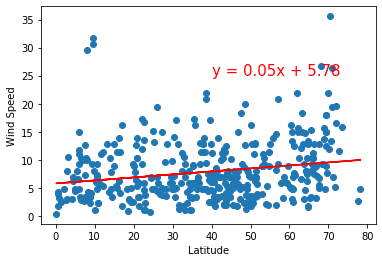

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


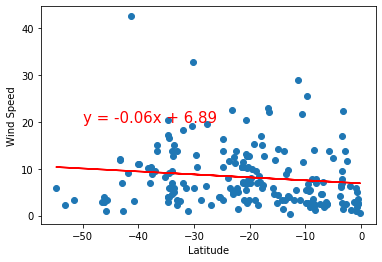